# Replica project

### Iconographic subset

Creates subset, stores pre-pooling embeddings for items in subset and for 5 most similar ones to each using embeddings, attempts clustering and mapper.

In [4]:
# loading the metadata
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import pickle
import sys
from tqdm import tqdm

from sklearn.cluster import DBSCAN
from sklearn import metrics
from deep_translator import GoogleTranslator

import random


sys.path.insert(0, "../model/")
from utils import *

sys.path.insert(0, "../web_annotation/")
from utils_clusters import *


path = '/home/guhennec/scratch/2021_Cini/TopologicalAnalysis_Cini/data/'
data_dir = '/scratch/students/schaerf/'
replica_dir = '/mnt/project_replica/datasets/cini/'
wga_dir = '/mnt/project_replica/datasets/WGA/'

path = '../data/'
data_dir = '../data/'
replica_dir = '../data/'
wga_dir = '../data/'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#metadata = pd.read_csv(path + 'Cini_20210811.csv', sep=';')
#metadata['path'] = metadata['Drawer'].astype(str) + '/' + metadata['Drawer'].astype(str) + '_' + metadata['ImageNumber'].astype(str) + '.jpg'
# metadata = pd.read_csv(data_dir + 'dedup_data.csv').drop(columns=['Unnamed: 0', 'level_0'])
metadata = pd.read_csv(data_dir + 'dedup_data_sample_wga.csv').drop(columns=['Unnamed: 0', 'level_0'])
metadata.head(5)

,Unnamed: 0.1,uid,cluster,index,AuthorOriginal,AuthorBirth,Description,path,BeginDate,uid_connection,img1,img2,type,annotated,set
0,0,ef24688d56f74848bcec4307b9b31f07,ef24688d56f74848bcec4307b9b31f07,115875,SEC XVII,NaN,Ritratto di una Palettoni.,/mnt/project_replica/datasets/cini/153C/153C_1...,1600.0,Not uid connection,NaN,NaN,NaN,NaN,NaN
1,1,1389306b5ed846c1bf8d34ff93edc1b0,1389306b5ed846c1bf8d34ff93edc1b0,9597,"GRECO, El","(b. 1541, Candia, d. 1614, Toledo)",St John the Evangelist,/mnt/project_replica/datasets/WGA/images/g/gre...,1577.0,Not uid connection,NaN,NaN,NaN,NaN,NaN
2,2,56eea2a886c74d3c967c9aadb441b32b,56eea2a886c74d3c967c9aadb441b32b,42188,PALLADIO Andrea,1508.0,"Capitelli. Penna, 292 x 197.",/mnt/project_replica/datasets/cini/19B/19B_369...,1526.0,Not uid connection,NaN,NaN,NaN,NaN,NaN
3,3,1769450bb16d4921a8fd4b36d9b9ab71,1769450bb16d4921a8fd4b36d9b9ab71,11482,MOLA Pier Francesco,1612.0,"Commedianti Penna e acquerello, 163 X 99.",/mnt/project_replica/datasets/cini/6C/6C_571.jpg,1630.0,Not uid connection,NaN,NaN,NaN,NaN,NaN
4,4,00e3786939204b8aac68580bae3df390,00e3786939204b8aac68580bae3df390,464,PADOVANINO (attr),1588.0,Figura piegata in avanti carboncino lumeggiato...,/mnt/project_replica/datasets/cini/1A/1A_12.jpg,1606.0,Not uid connection,NaN,NaN,NaN,NaN,NaN


In [5]:
def catch(func, handle=lambda e: e, *args, **kwargs):
    '''Prevents list comprehensions from going into an error when an exception occurs'''
    try:
        return func(*args, **kwargs)
    except Exception as e:
        return e


In [6]:
metadata.loc[:, 'Description (EN)'] = [catch(lambda : GoogleTranslator(source='auto', target='en').translate(word)) 
                                      for word in tqdm(list(metadata.loc[:, 'Description'].astype(str)))]


  2%|▏         | 303/14948 [05:13<4:44:19,  1.16s/it]

In [3]:
# in jeanne's code
# with open(path + 'save_link_data_2018_08_02.pkl', 'rb') as f:
#     morpho_graph_complete = pickle.load(f)

# # contains uid	img1	img2	type	annotated
# morpho_graph_complete.head()

In [4]:
madonnas = metadata[metadata['Description'].fillna('').str.contains('Madonna col Bambino')]#['Description']
madonnas.shape

(2074, 47)

In [4]:
# positives = get_train_test_split(madonnas, morpho_graph_complete)
# positives = positives.groupby('uid_connection').first().reset_index()
# print(positives.shape)
# positives.head()

In [5]:
train = madonnas[madonnas['set'].isin(['train', 'val', 'test'])]
train.shape

(274, 47)

## Getting set of images to store embeddings of

In [19]:
# embeddings = np.load(
#                     #data_dir + 'resnext-101_avg_480' + ".npy",
#                     data_dir + 'embeddings/resnext-101_epoch_314-04-2022_23:25:29.npy',
#                     allow_pickle=True,
#                 )        

In [6]:
# tree, reverse_map = make_tree_orig(embeddings, reverse_map=True)

In [6]:
with open(data_dir + 'uid2path.pkl', 'rb') as outfile:
        uid2path = pickle.load(outfile)


In [8]:
# sim_arts = []
# for i, artwork in enumerate(madonnas.iterrows()):
#     if artwork[1]['uid'] in reverse_map.values():
#         sim_arts.append(find_most_similar_orig(artwork[1]["uid"], tree, embeddings, reverse_map, n=6))

            

In [9]:
# sim_arts = list(set([x for xx in sim_arts for x in xx]))
# print(len(sim_arts))
# sim_arts

In [10]:
# final = list(set(sim_arts + list(madonnas['uid'])))
# final
# print(len(final))

In [7]:
# with open(data_dir + 'list_iconography.pkl', 'wb') as oufile:
#     pickle.dump(final, oufile)
    

with open(data_dir + 'list_iconography.pkl', 'rb') as infile:
    final = pickle.load(infile)


In [12]:
#make_embds_pooled()  #store also for normal embeddings
# make new metadata file with all madonnas (so include also the 5 most similar ones that are now in files)

In [13]:
# embeds = np.load(data_dir + 'embedding_no_pool/madonnas_pooled.npy', allow_pickle=True)
# print(embeds.shape)

In [15]:
# embeds = np.load(data_dir + 'embedding_no_pool/madonnas.npy', allow_pickle=True)
# print(embeds.shape)

In [17]:
# match_feature_maps_simple(embeds[4, 1], embeds[7, 1], norm=True)

In [21]:
# embeds.shape

(2654, 2)

In [14]:
# sim_mat, index = sim_matrix_rerank(embeds)
# np.save(data_dir + 'embedding_no_pool/' 'similarities_madonnas.npy', sim_mat)

In [8]:
sim_mat = np.load(data_dir + 'similarities_madonnas_2600.npy', allow_pickle=True) #embedding_no_pool/

In [9]:
diff_mat = np.round(1 - sim_mat, 3)
diff_mat

array([[0.   , 0.667, 0.627, ..., 0.679, 0.525, 0.725],
       [0.667, 0.   , 0.439, ..., 0.56 , 0.482, 0.6  ],
       [0.549, 0.439, 0.   , ..., 0.611, 0.448, 0.521],
       ...,
       [0.642, 0.56 , 0.667, ..., 0.012, 0.446, 0.559],
       [0.508, 0.536, 0.448, ..., 0.446, 0.   , 0.661],
       [0.745, 0.6  , 0.562, ..., 0.559, 0.661, 0.   ]])

In [22]:
#sim_mat = StandardScaler().fit_transform(sim_mat)
db = DBSCAN(eps=0.1, min_samples=2, metric='precomputed').fit(diff_mat)

In [23]:
labels = final[:2600]
classes = db.labels_

clusters = pd.DataFrame({'uid':labels, 'cluster':classes})
clusters['cluster'].value_counts(), clusters['cluster'].nunique()

(-1     1763
  1      615
  7        8
  33       7
  11       5
        ... 
  83       1
  81       1
  88       1
  56       1
  94       1
 Name: cluster, Length: 97, dtype: int64,
 97)

In [24]:
clusters['path'] = clusters['uid'].apply(lambda x: uid2path[x])
clusters.head()

,uid,cluster,path
0,7ca6585c152b47fcbba64ec11915f11a,-1,25A/25A_292.jpg
1,9c64efe6c48e412ba37259d282087112,0,112A/112A_605.jpg
2,b5b9eed8509e421480f10018bfdb6c8b,1,62B/62B_315.jpg
3,103a9d19f9d7454a8565ff99c2a21d47,-1,14B/14B_83.jpg
4,61948d265f8a430483593ed41dffa02d,2,123A/123A_411.jpg


64


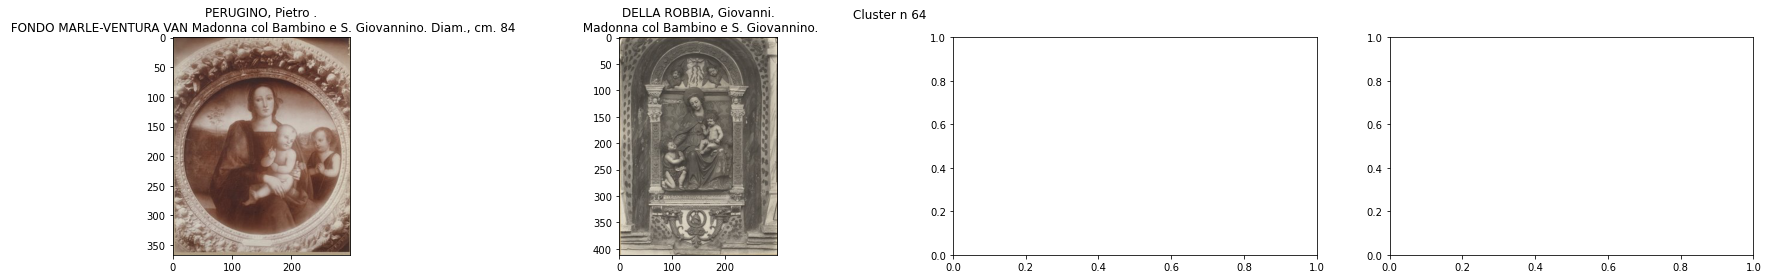

In [29]:
i = random.randint(0, clusters['cluster'].nunique())
print(i)
draw_clusters(i, clusters, metadata)

Estimated number of clusters: 437
Estimated number of noise points: 0


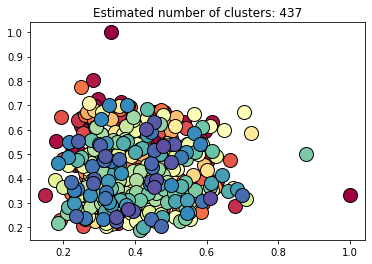

In [26]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(sim_mat, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = sim_mat[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = sim_mat[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
# if done only on annotated data

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)